In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
class Numerical_methods:
    
    def __init__(self,f):  
        
        self.f=f
        self.x=[]
        self.t=[]
        self.N_dim=[]
        
        
    def Initialise(self,x_start,t_start):
        
        self.N_dim=np.shape(x_start)[0]
        self.x=x_start
        self.t=t_start
    
    # Runge Kutta 2
    def RungeKutta2(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            k1=self.f(self.x,self.t)
            k2=self.f(self.x+dt*k1,self.t+dt)    
                        
            self.x=self.x+dt*(k1+k2)/2
            
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T

Text(0, 0.5, 'Predator number')

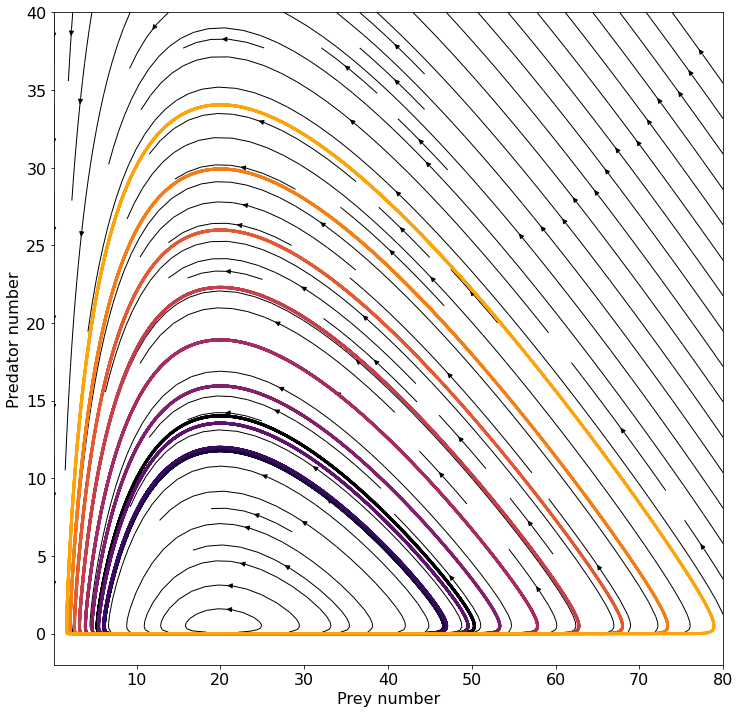

In [5]:
# Lotka Volterra model
def f(x,t): 
    
    alpha=0.01
    beta=0.02
    gamma=0.4
    delta=0.02
    
    z=np.zeros([np.shape(x)[0]])
    
    z[0]=x[0]*(alpha-beta*x[1])
    z[1]=x[1]*(delta*x[0]-gamma)
    
    return z

NM=Numerical_methods(f)           ## Object definition

dt=0.01                           ## Value of dt
N_iter=int(1000/dt)               ## Number of iteration. 

N_tr=10 

X_RK2=np.zeros([N_tr,2,N_iter])

for i in range(N_tr):
    
    x_start=[10+5*i,10+i]          # Different initial conditions for different solutions
    t_start=0.

    NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object

    X_RK2[i,:,:],ts=NM.RungeKutta2(dt,N_iter)     ## Perform Runge-Kutta 2 and save it

N_x=20

x1=np.linspace(0.1,80,N_x)           ## x values considered
x2=np.linspace(0.1,40,N_x)           ## y values considered

X1,X2=np.meshgrid(x1,x2)             ## np.meshgrid creates a grid with the data across the x and y dimension

Z1=np.zeros([N_x,N_x])               ## This contains the direction across x for each data point in the grid
Z2=np.zeros([N_x,N_x])               ## This contains the direction across y for each data point in the grid

dt=0.01
for i in range(N_x):
    for j in range(N_x):
        
        prime=f([X1[i,j],X2[i,j]],0)  ## The 'arrows' are simply the function defining the system of differential equations 
                                      ## evaluated at different points of the grid

        Z1[i,j]=prime[0]              ## Save the value of the 'arrows' across x for the data point considered
        Z2[i,j]=prime[1]              ## Save the value of the 'arrows' across y for the data point considered

plt.rcParams.update({'font.size': 16})        

fig, ax = plt.subplots(figsize=(12, 12))
        
Q = plt.streamplot(X1, X2, Z1, Z2, color='black',density=1.2,linewidth=1)  ## plt.stgreamplot does a plot of the arrows Z1 (value of the arrow across x) and Z2 (value of the arrow across y) at 
                                                                           ## the positions X1 and X2 
                                                                           
cl=cm.inferno(np.linspace(0,0.8,N_tr))    # Colormap used to plot the different solutions

## Plot the solutions iteratively
for i in range(N_tr):
    
    plt.plot(X_RK2[i,0,:],X_RK2[i,1,:],color=cl[i,:],linewidth=3)
  
plt.xlabel('Prey number')
plt.ylabel('Predator number')